In [ ]:
import pandas as pd
import numpy as np
import os
import pickle
from datetime import datetime, timedelta
from indicators import zigzag,resample

from django.conf import settings

DATA_FILE = "../log/pchange_data.pkl"
def load_data_file(ruta):
    try:
        if os.path.exists(ruta):
            with open(ruta, "rb") as archivo:
                return pickle.load(archivo)
    except Exception as e:
        print(f"Error al cargar el archivo {ruta}: {e}")
    return {}

def ohlc_from_prices(prices,resample_period):
    df = pd.DataFrame({'close': prices})
    df['high'] = df['close']
    df['low'] = df['close']
    df['open'] = df['close'].shift()
    df['volume'] = 0.0
    now = datetime.now().replace(second=0, microsecond=0)  # Fecha y hora actuales
    intervalos = [now - timedelta(minutes=i) for i in range(len(df))]
    df['datetime'] = intervalos[::-1]  # Revertir el orden para que el último sea el actual

    df = resample(df,periods=resample_period)
    return df

<Axes: xlabel='datetime'>

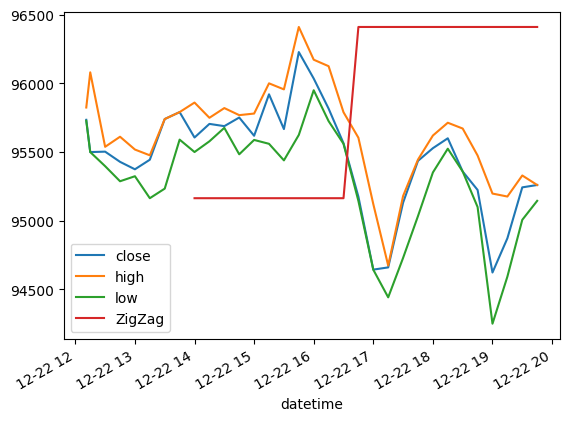

In [31]:
data = load_data_file(DATA_FILE)
symbol = 'BTCUSDT'
prices = data['symbols'][symbol]['c_1m']

df = ohlc_from_prices(prices,15)
df = zigzag(df)
df['ZigZag'] = df['ZigZag'].fillna(method='ffill')
df.set_index('datetime',inplace=True)

df[['close','high','low','ZigZag']].plot()